In [24]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [ ]:
# Le dataset principal qui contient toutes les images
print (mnist.data.shape)

# Le vecteur d'annotations associé au dataset (nombre entre 0 et 9)
print (mnist.target.shape)

(70000, 784)
(70000,)


In [25]:
import numpy as np
data = mnist.data.sample(5000)
target = mnist.target.iloc[list(data.index)]

In [26]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

In [27]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
error = 1 - knn.score(xtest, ytest)
print('Erreur: %f' % error)

Erreur: 0.070000


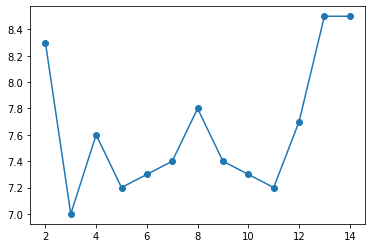

In [ ]:
import matplotlib.pyplot as plt

errors = []
for k in range(1,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(1,15), errors, 'o-')
plt.show()

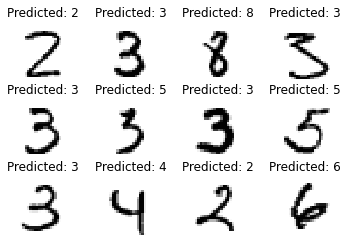

In [ ]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(3)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

# On redimensionne les données sous forme d'images
images = xtest.values.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()

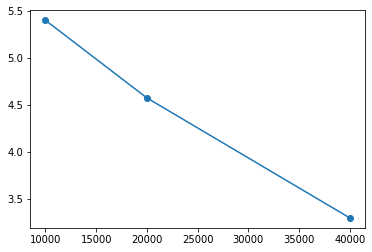

In [ ]:
errors = []
for n in [10000, 20000, 40000]:
  data = mnist.data.sample(n)
  target = mnist.target.iloc[list(data.index)]
  xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)
  knn = neighbors.KNeighborsClassifier(n_neighbors=3)
  errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot([10000,20000,40000], errors, 'o-')
plt.show()

In [ ]:
def manhattan(a, b):
    return sum(abs(val1-val2) for val1, val2 in zip(a,b))

In [28]:
data = mnist.data.sample(5000)
target = mnist.target.iloc[list(data.index)]
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)
knn = neighbors.KNeighborsClassifier(n_neighbors=3, metric="manhattan")
knn.fit(xtrain, ytrain)
error_manhattan = 1 - knn.score(xtest, ytest)
print("error_manhattan", error_manhattan)
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain, ytrain)
error_euclidian = 1 - knn.score(xtest, ytest)
print("error_euclidian", error_euclidian)



error_manhattan 0.08299999999999996
error_euclidian 0.08099999999999996
